# Linear Regression

## Dependencies

Ensue that the required libraries have been installed locally as per the README.md file included in the this project.

Run the following cell then import the required dependencies for this notebook.

In [1]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from sklearn.linear_model import LinearRegression  # For linear regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score  # For model evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling

## Load Data

The following notebook was designed detect and assess correlation between Air Quality and Health Outcome Data using a Linear Regression Model.

Data has been aggregated to both the monthly and annual level for analysis. Additionally, the datasets have been divided into separate measures for Males and Females, as well as aggregated Genderless data.

The following defines the paths to the four possible datasets which can be analyzed with this model. This notebook has been designed to accommodate a dynamic number of Health Statistic columns, make it flexible to whichever dataset the user would like to analyze.

In [2]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated-data/processed-annual-genderless.csv',       # 0 - Annual Genderless
    '../datasets/_integrated-data/processed-annual-gendered.csv',         # 1 - Annual Gendered
    '../datasets/_integrated-data/processed-monthly-genderless.csv',      # 2 - Monthly Genderless
    '../datasets/_integrated-data/processed-monthly-gendered.csv'         # 3 - Monthly Gendered
]

Manually set the desired dataset to analyze based on following indexes:
- 0 : Annual Genderless Data
- 1 : Annual Gendered Data
- 2 : Monthly Genderless Data
- 3 : Monthly Gendered Data

In [3]:
# Choose the dataset to be used.
choose_dataset = 1

Load the chosen dataset to a dataframe.

In [4]:
# Read the chosen dataset.
df = pd.read_csv(paths[choose_dataset])

## Additional Set Up

Here is some additional configuration to the environment and data. 

In [5]:
# Define the model
model = LinearRegression()

# Drop the date and local health district columns (they are not relevant for the model)
df = df.drop(columns=df.columns[:2])                                                    # Drop the first two columns

pollutant_columns = df.columns[:6]                                                      # Get the names of the pollutant columns
health_stat_columns = df.columns[6:]                                                    # Get the name of the health statistic column

# Scale all data in the dataframe.
scaler = StandardScaler()                                                               # Create a scaler
numerical_cols_annual = df.select_dtypes(include=['number']).columns                    # Select all numerical columns
df[numerical_cols_annual] = scaler.fit_transform(df[numerical_cols_annual])             # Scale all numerical columns

## All Features (Pollutants)

Here we display a graph for each label (dependent variable) in the chosen dataset, using all features (independent variables) available to it.

The model trains itself on a random selection of labels and features, then predicts a selection of labels using corresponding features.

The accuracy of the model showcases the likelihood of correlation between Air Quality and Health Outcomes.

The metrics used are as follows:
* **R² (Coefficient of Determination)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
* **Mean Squared Error (MSE)**: Measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.
* **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction.
* **Root Mean Squared Error (RMSE)**: The square root of the average of squared differences between prediction and actual observation. It provides a measure of how well the model predictions fit the data.
* **Mean Absolute Percentage Error (MAPE)**: Measures the accuracy of a forecasting method as a percentage. (Note that due to scaling the data to small numbers, MAPE outputs unreliable readings).
* **Explained Variance Score (EVS)**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

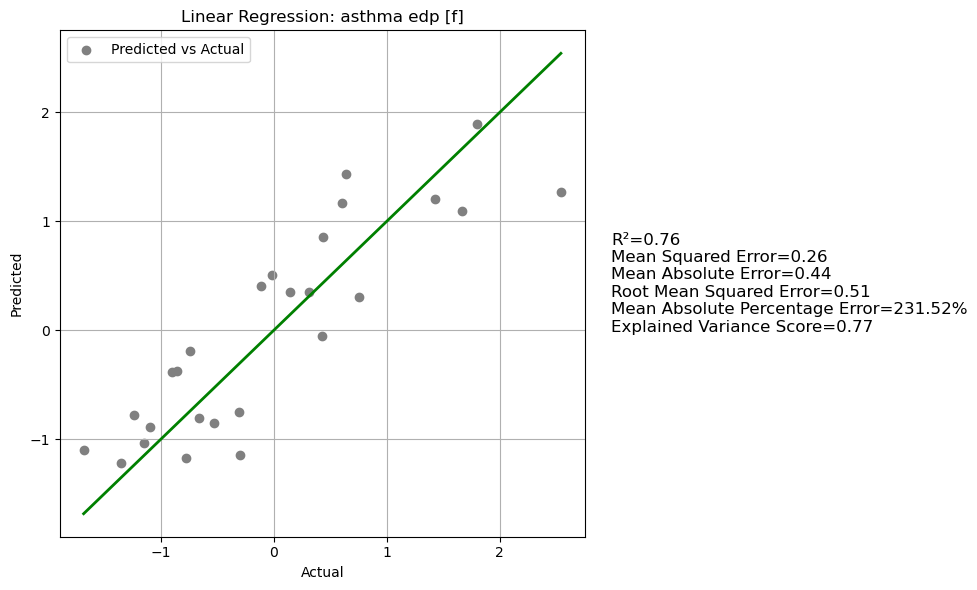

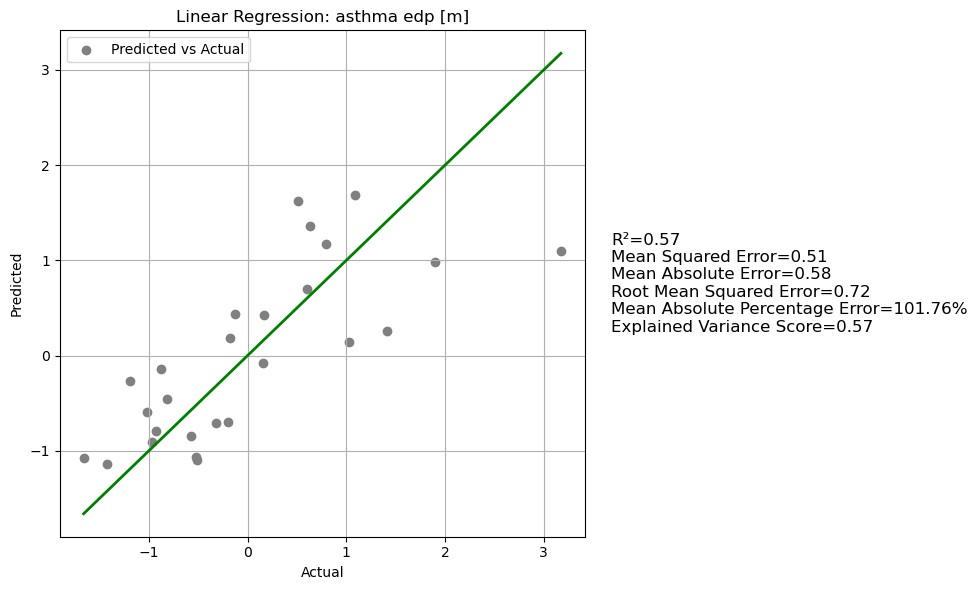

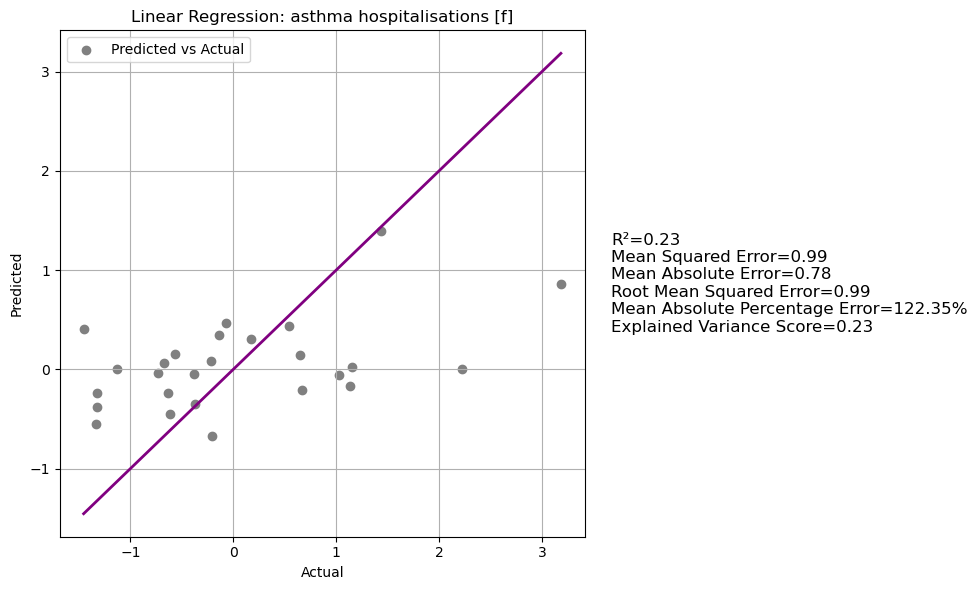

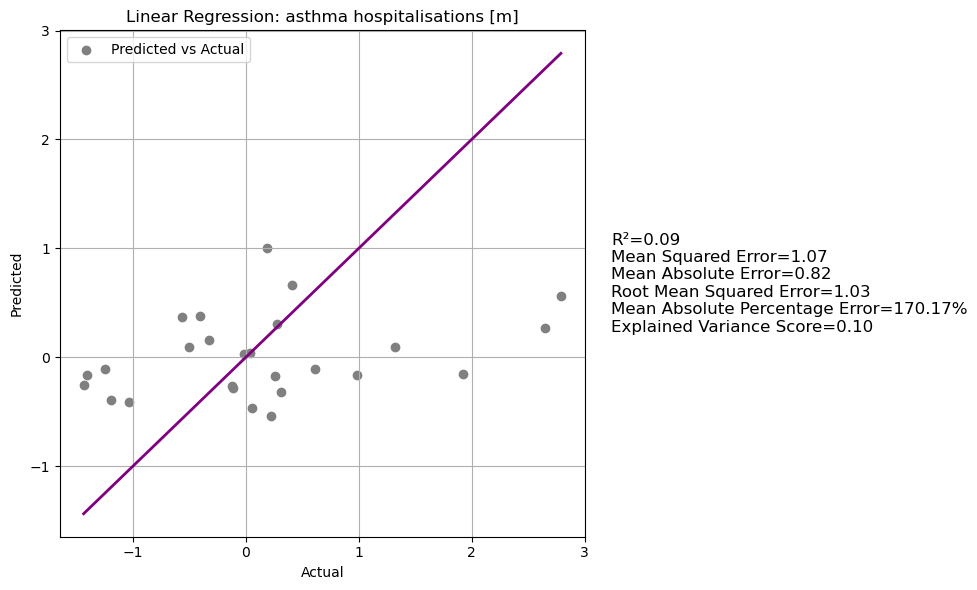

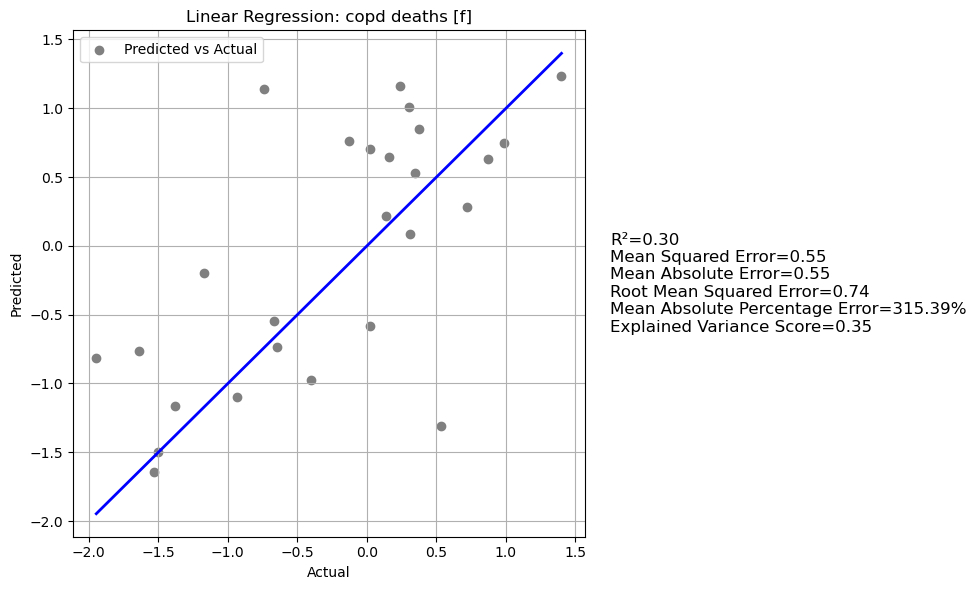

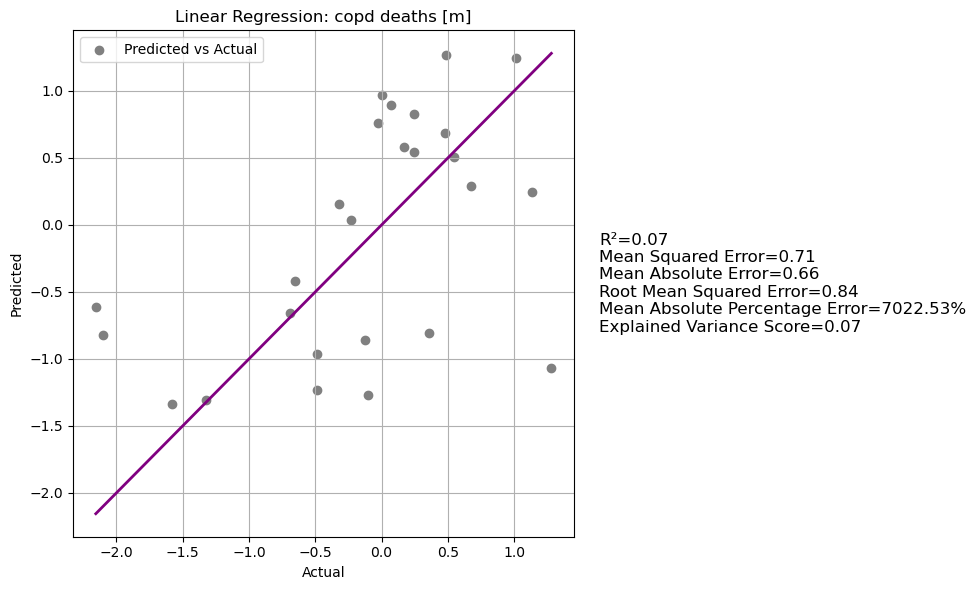

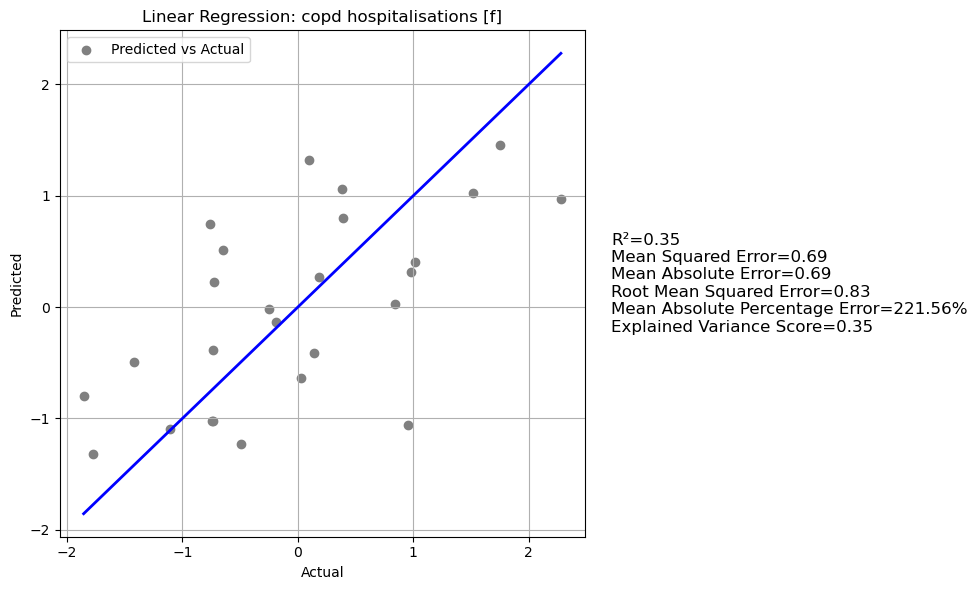

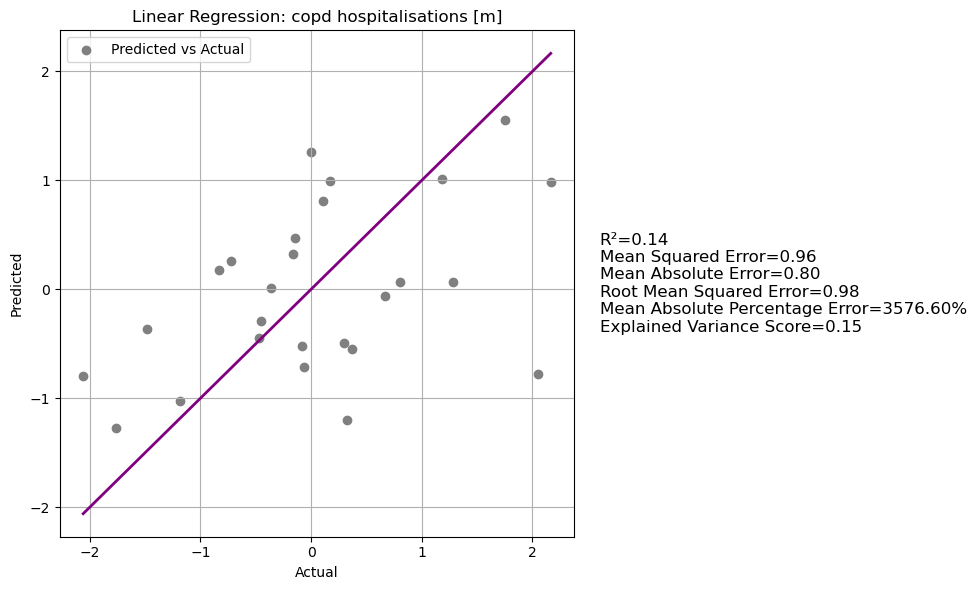

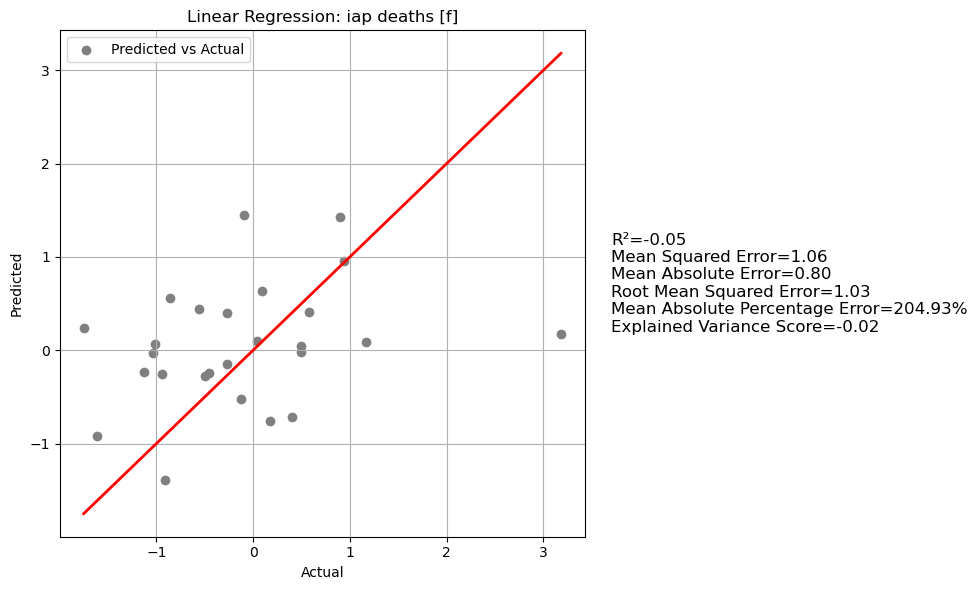

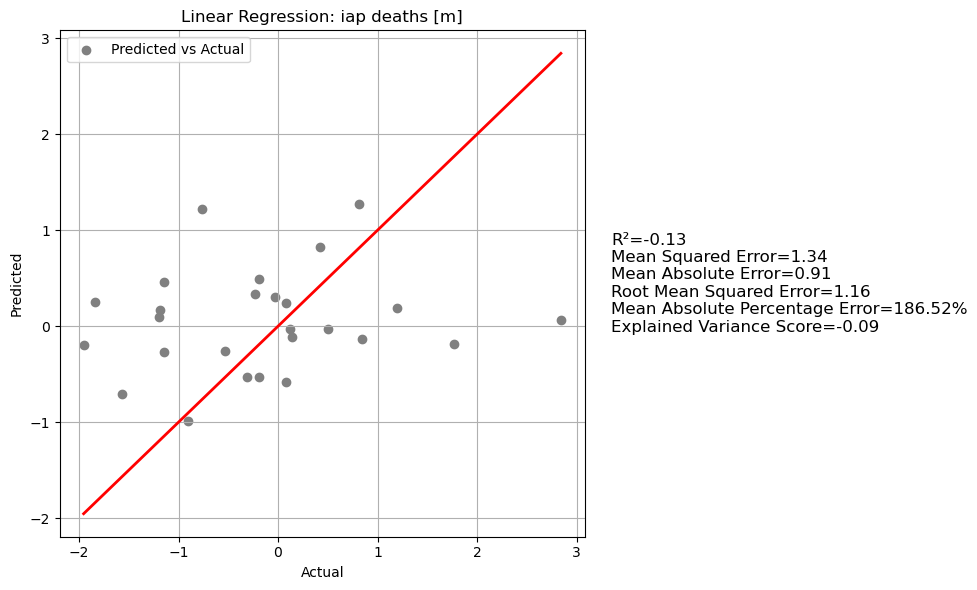

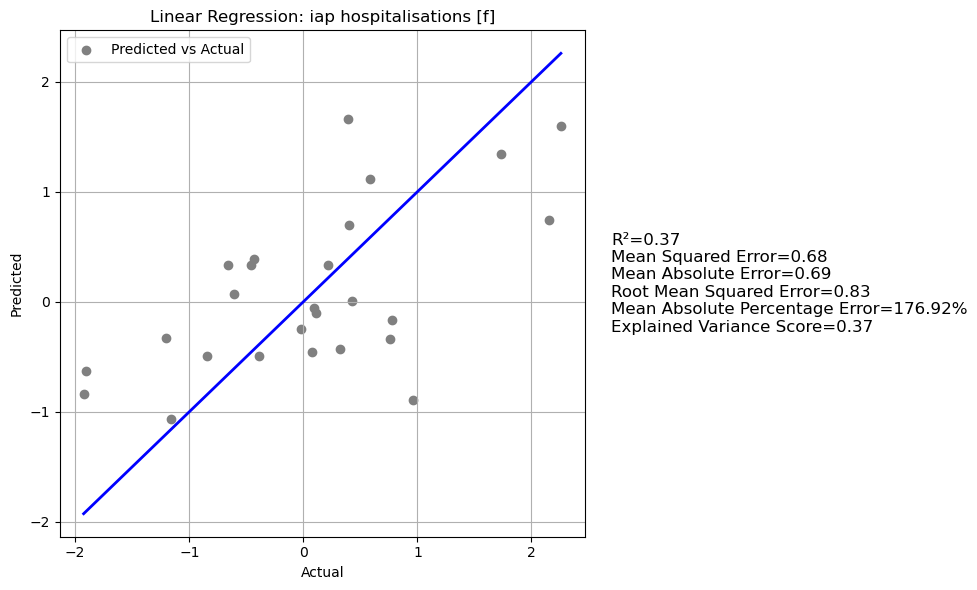

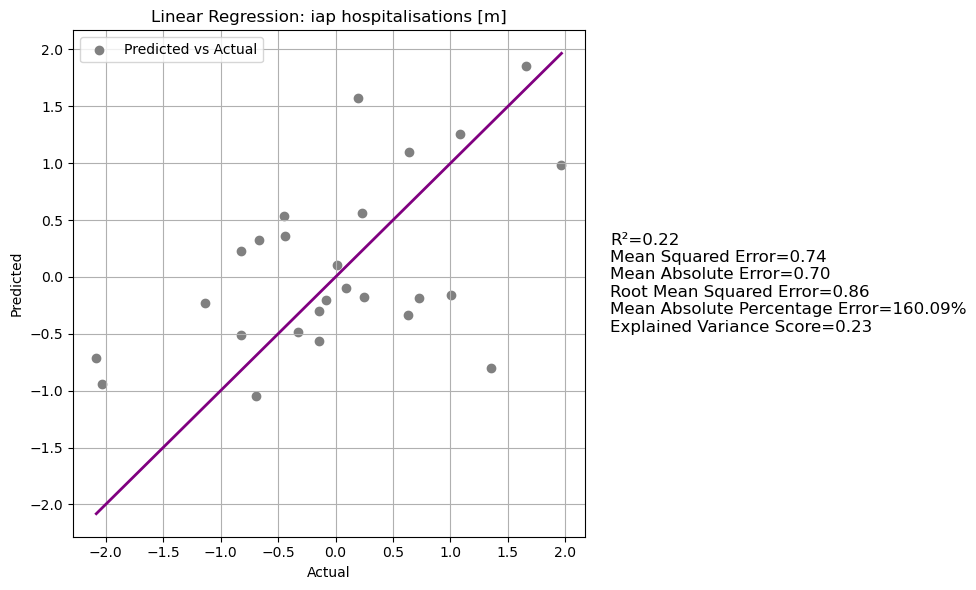

In [6]:
# Loop through each health statistic column
for i, health_stat in enumerate(health_stat_columns):
    X = df[pollutant_columns].values                                                                        # Independent variables (pollutants)
    y = df[health_stat].values                                                                              # Dependent variable (health statistic)
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)               
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)                                                                          # Predict the dependent variable on the test data
    
    # Calculate various evaluation metrics
    r2 = r2_score(y_test, y_pred)                                                                           # R² score
    mse = mean_squared_error(y_test, y_pred)                                                                # Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)                                                               # Mean Absolute Error
    rmse = np.sqrt(mse)                                                                                     # Root Mean Squared Error
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100                                                # Mean Absolute Percentage Error
    evs = explained_variance_score(y_test, y_pred)                                                          # Explained Variance Score

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'                                                                                 # Red color for negative R² scores (no correlation)
    elif 0 < r2 <= 0.3:
        line_color = 'purple'                                                                              # Purple color for R² scores between 0 and 0.3 (poor correlation)
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'                                                                                # Blue color for R² scores between 0.3 and 0.5 (promising correlation)
    else:
        line_color = 'green'                                                                               # Green color for R² scores above 0.5 (acceptable correlation)
        
    # Create a new figure for each health statistic
    plt.figure(figsize=(10, 6))
    
    # Plot the actual vs predicted values
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2)
    plt.xlabel('Actual')                                                                                    # Label for x-axis
    plt.ylabel('Predicted')                                                                                 # Label for y-axis
    plt.title(f'Linear Regression: {health_stat}')                                                          # Title of the plot
    plt.legend()                                                                                            # Show legend
    plt.grid(True)                                                                                          # Show grid
    
    # Display evaluation metrics next to the plot with full names
    metrics_text = (f'R²={r2:.2f}\n'
                    f'Mean Squared Error={mse:.2f}\n'
                    f'Mean Absolute Error={mae:.2f}\n'
                    f'Root Mean Squared Error={rmse:.2f}\n'
                    f'Mean Absolute Percentage Error={mape:.2f}%\n'
                    f'Explained Variance Score={evs:.2f}')
    plt.text(1.05, 0.5, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')
    
    plt.tight_layout()                                                                                      # Adjust subplots to fit into figure area.
    plt.show()                                                                                              # Display the plot


## Single Features (Pollutants)

Here we display a subplot for each label, analysing each feature separately to determine the impact of a single pollutant on a health outcome.

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


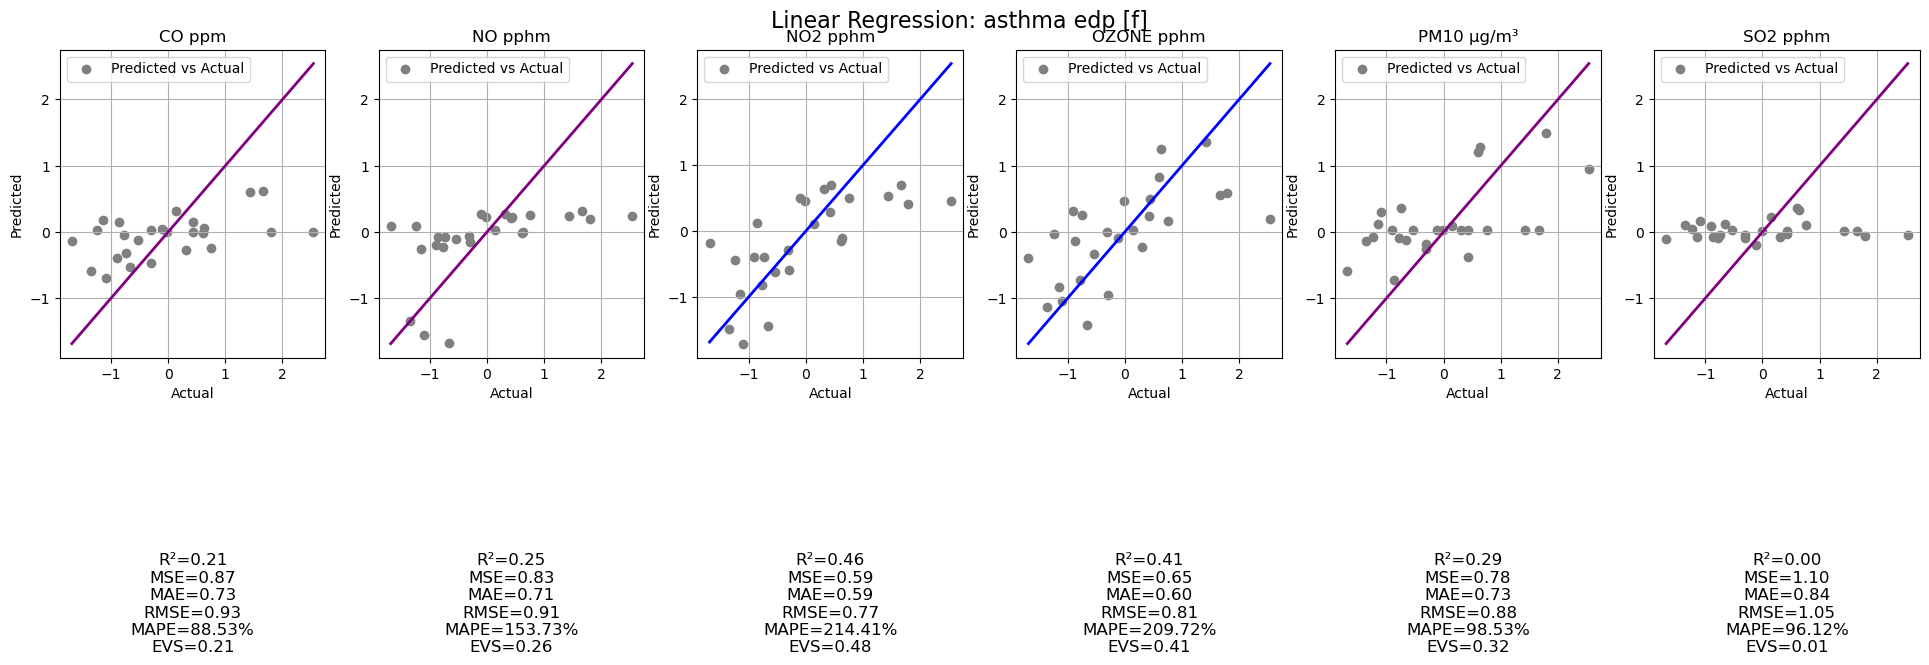

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


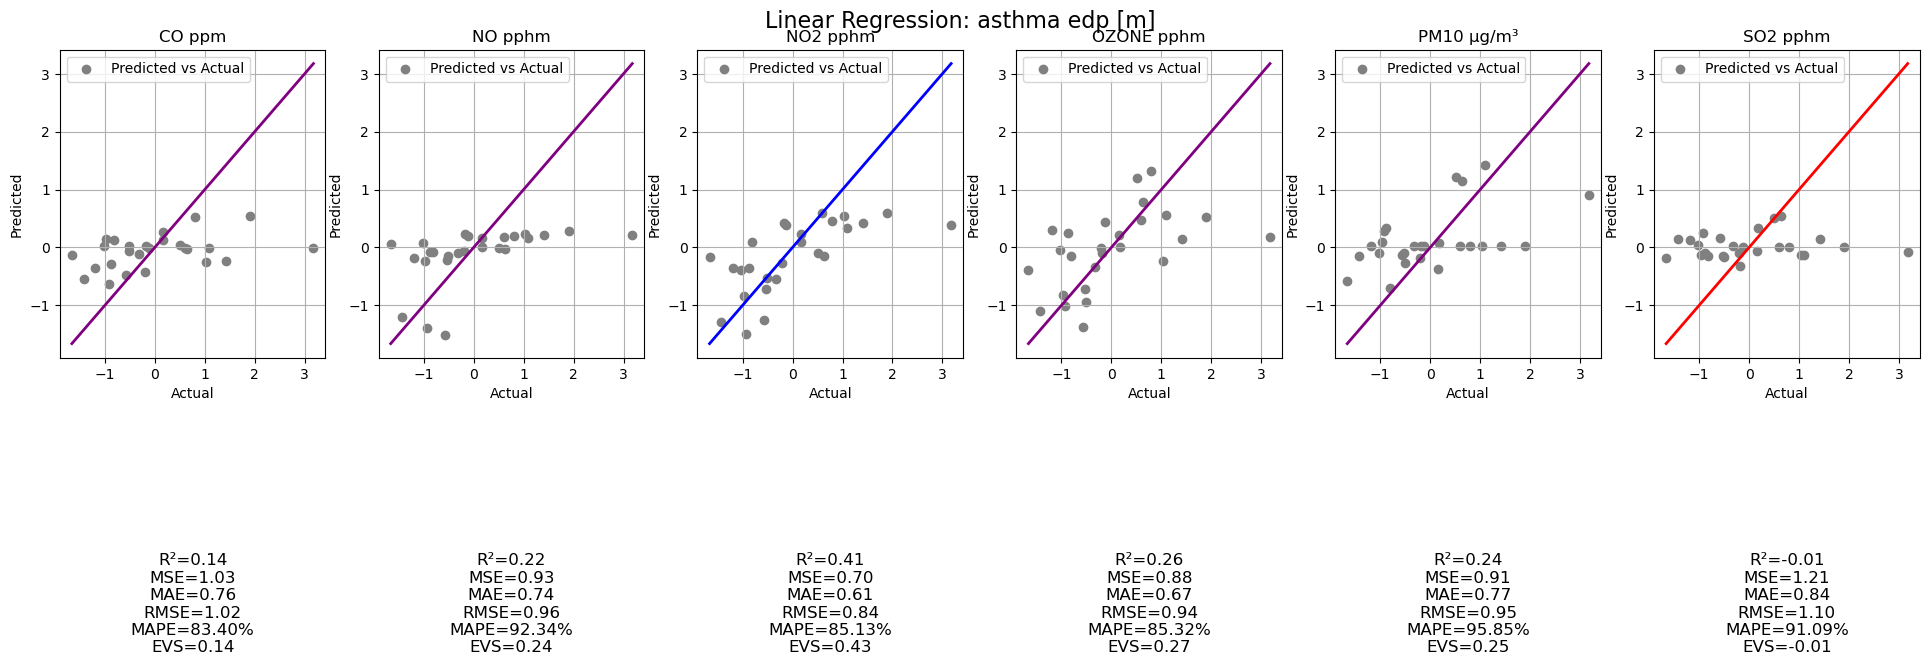

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


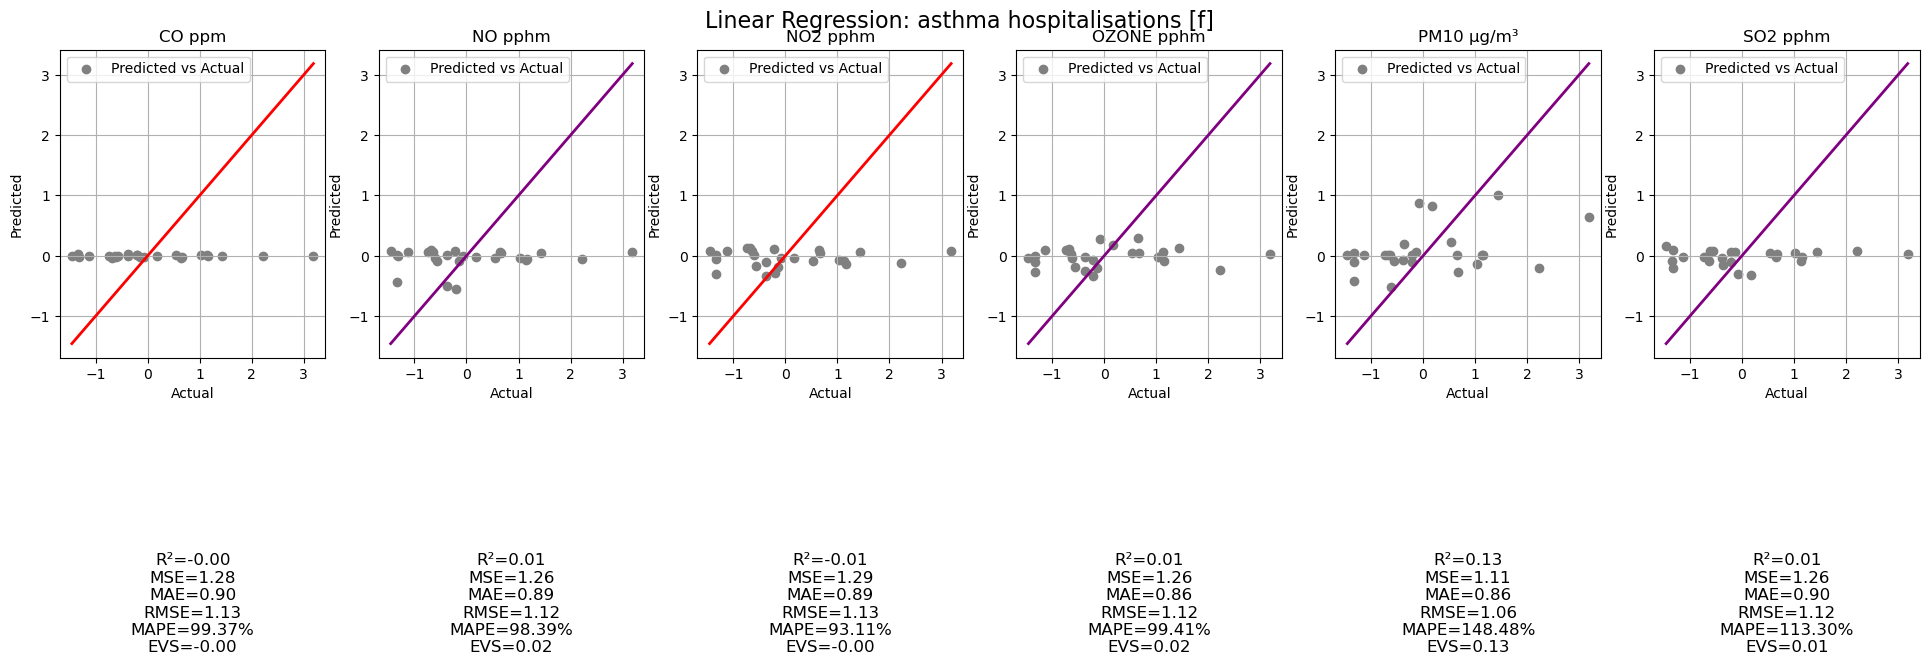

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


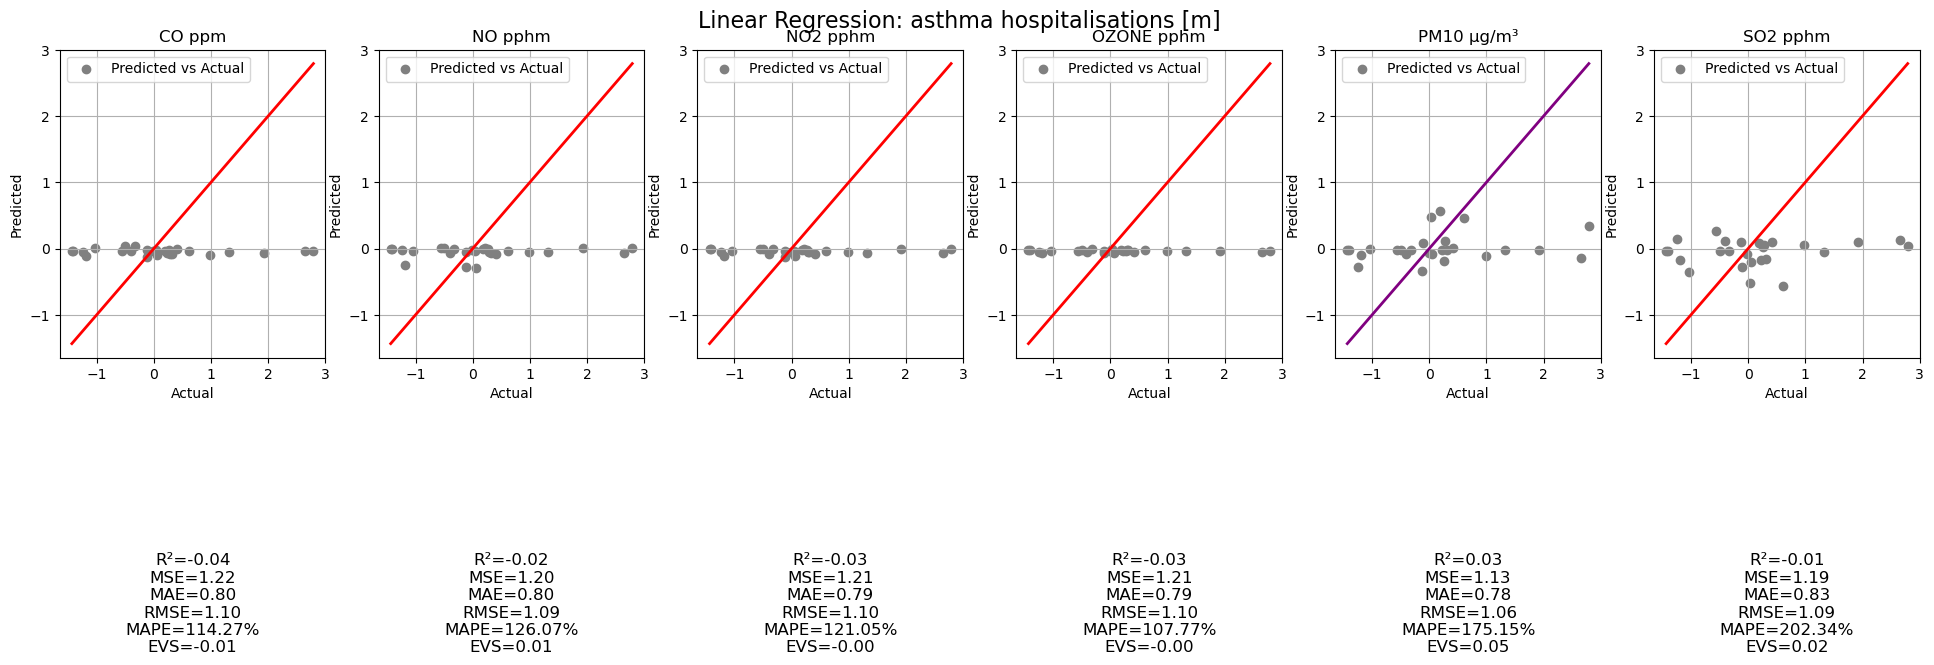

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


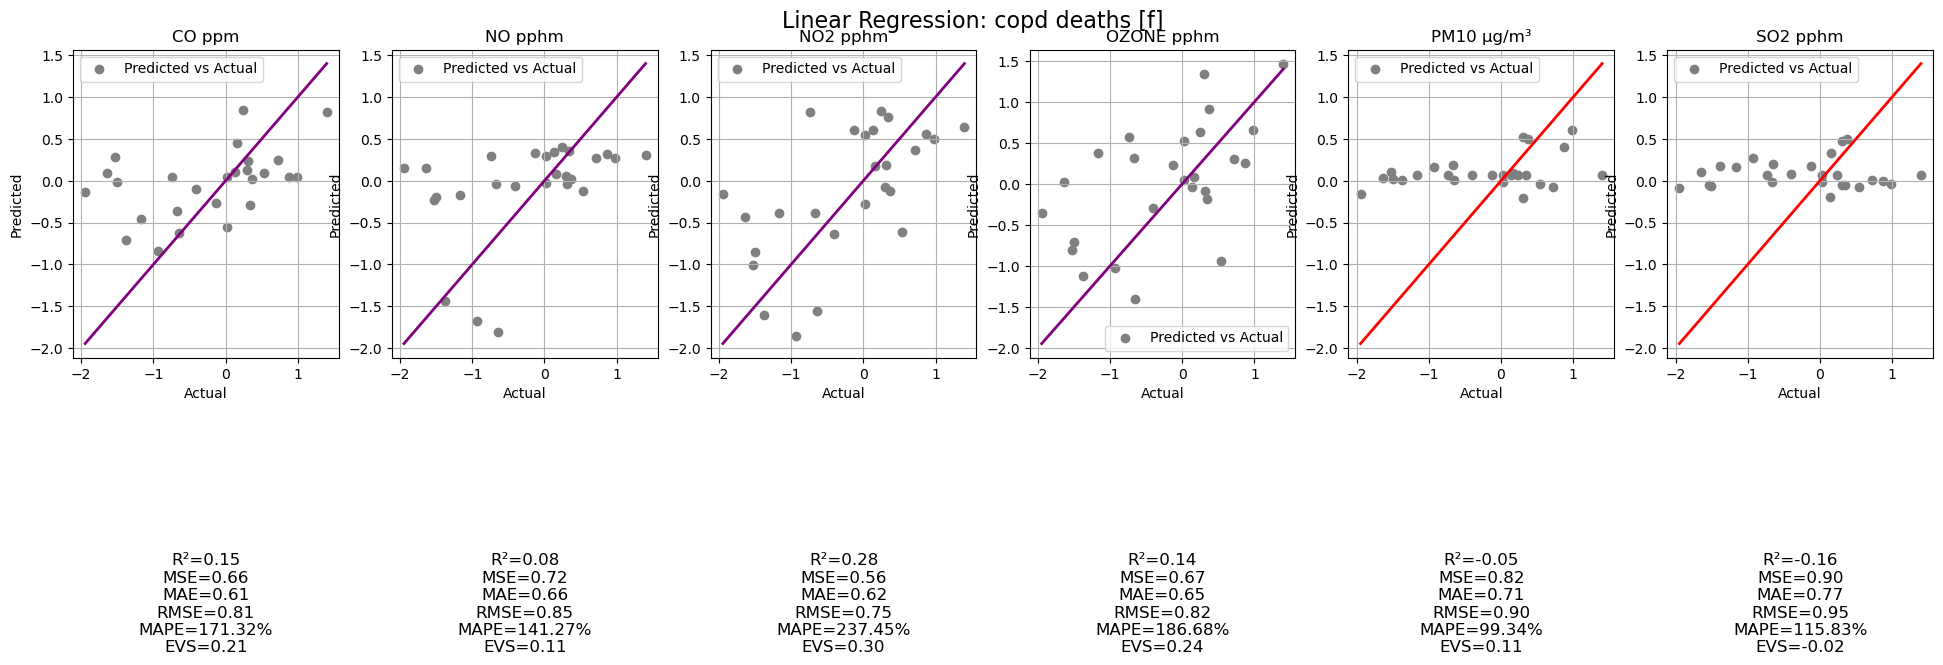

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


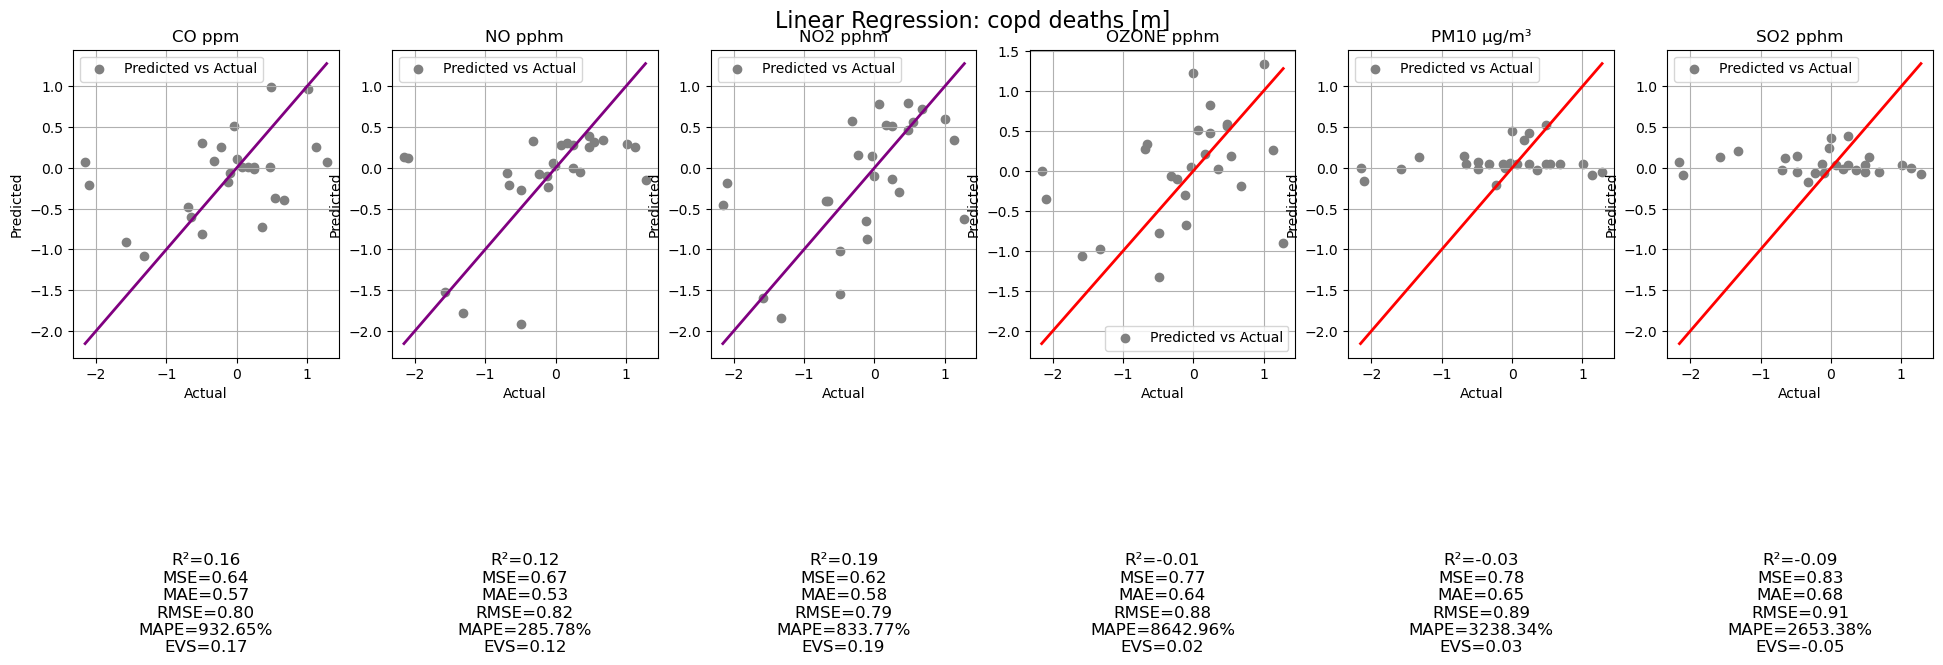

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


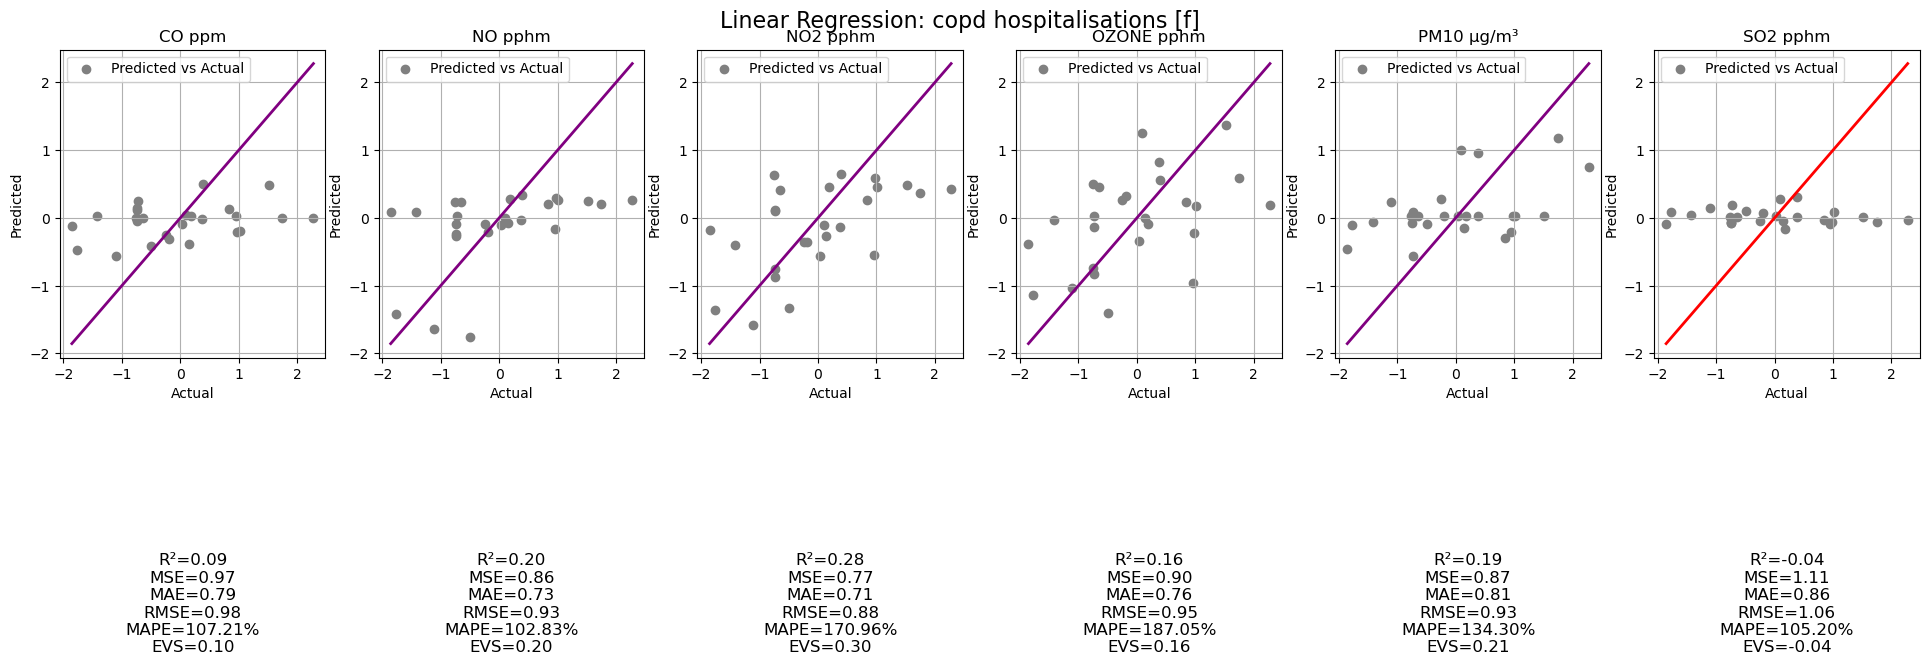

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


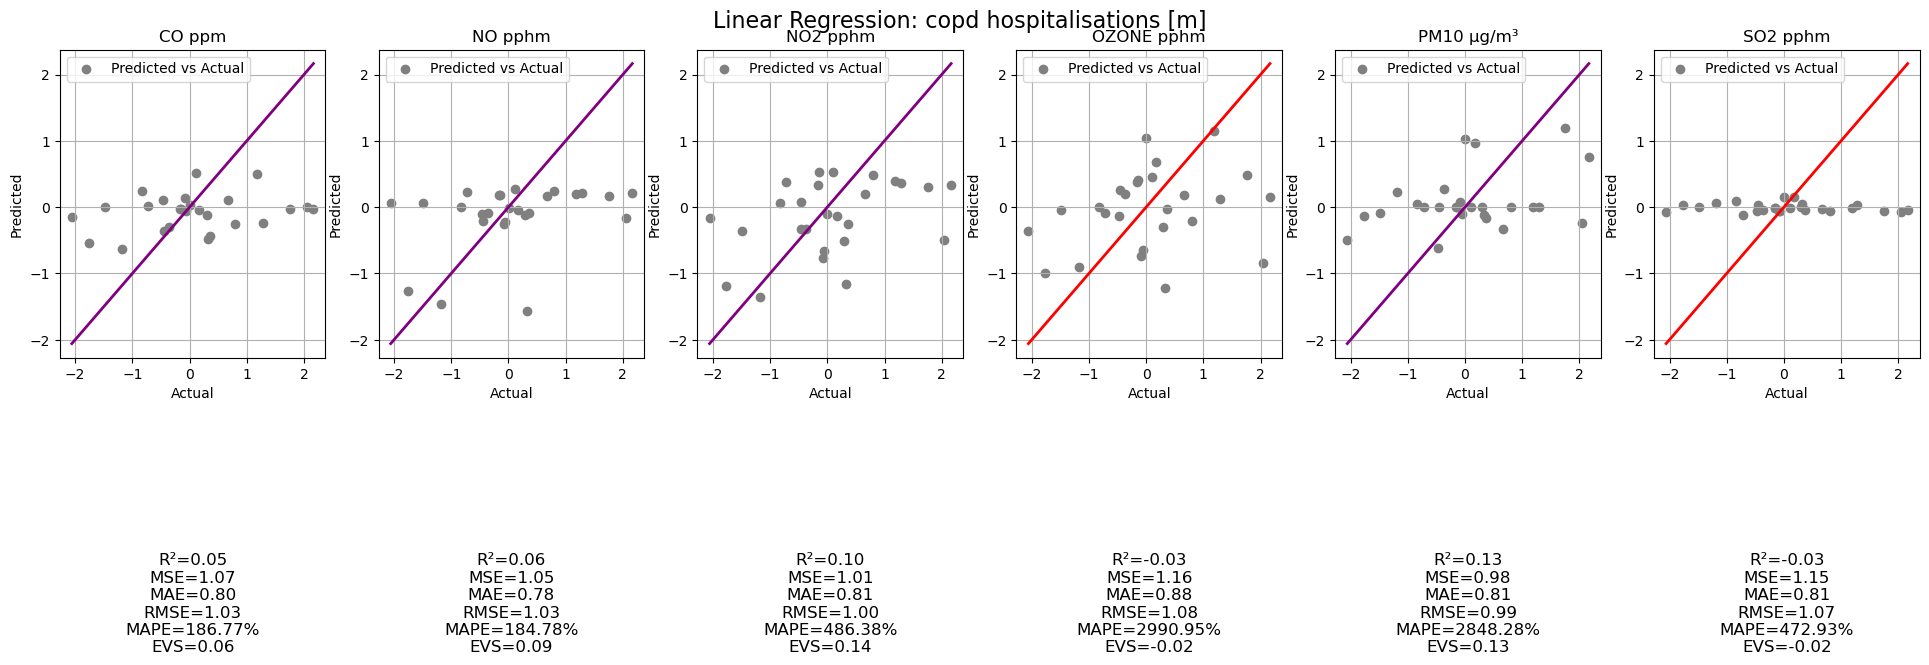

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


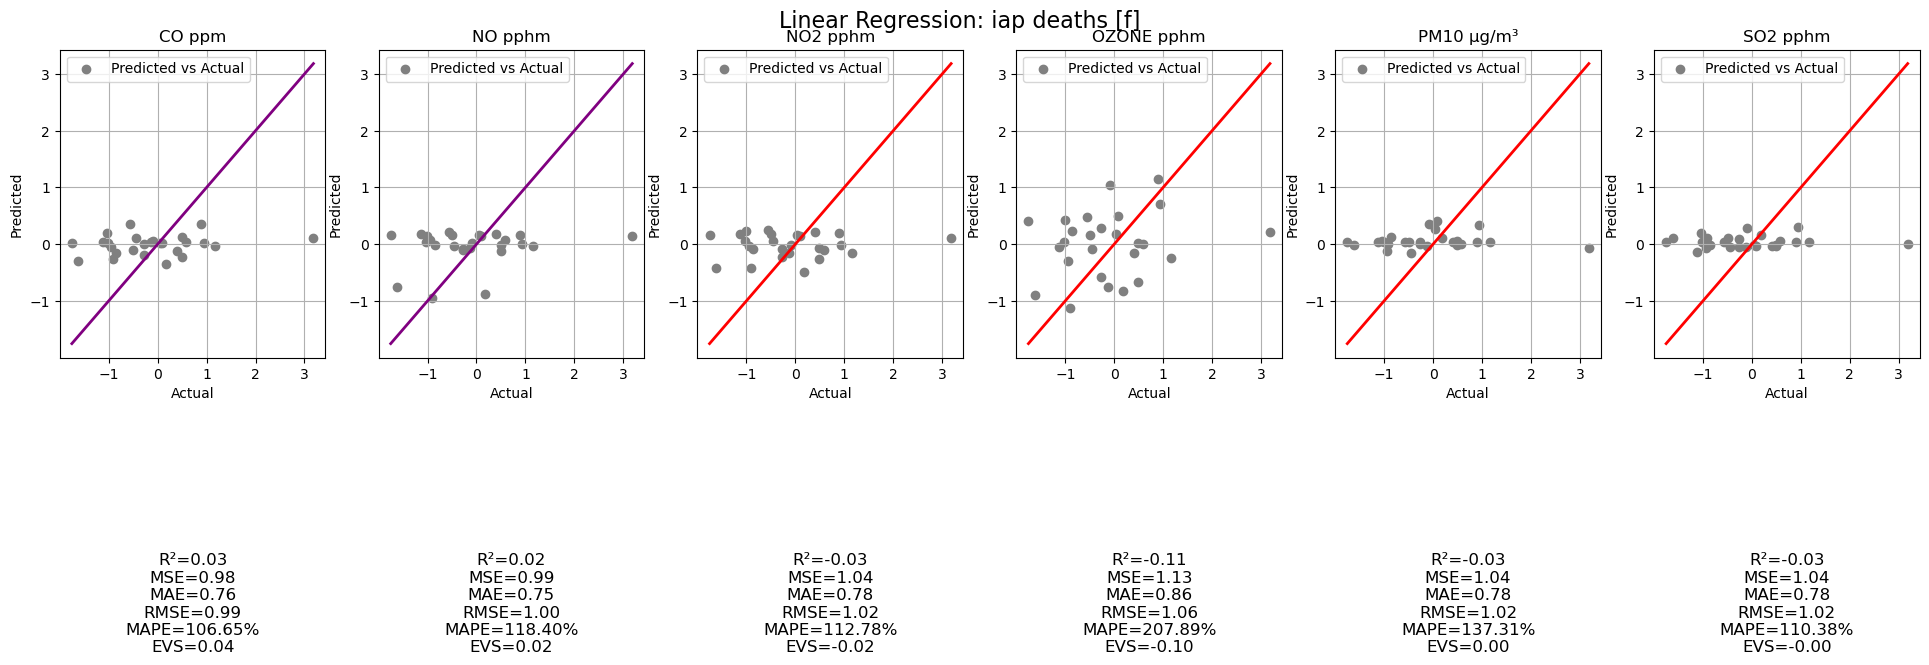

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


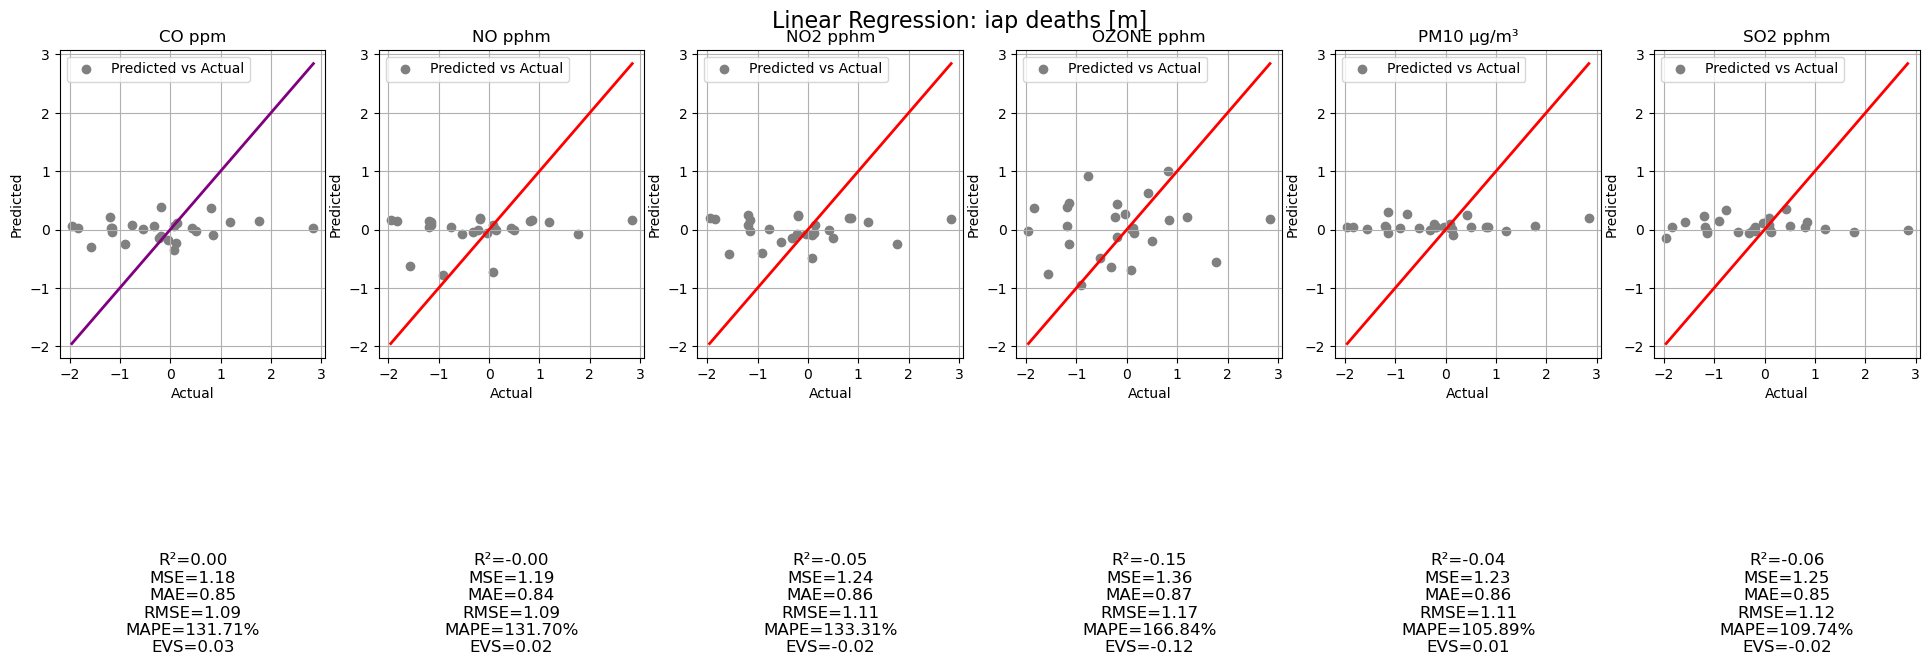

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


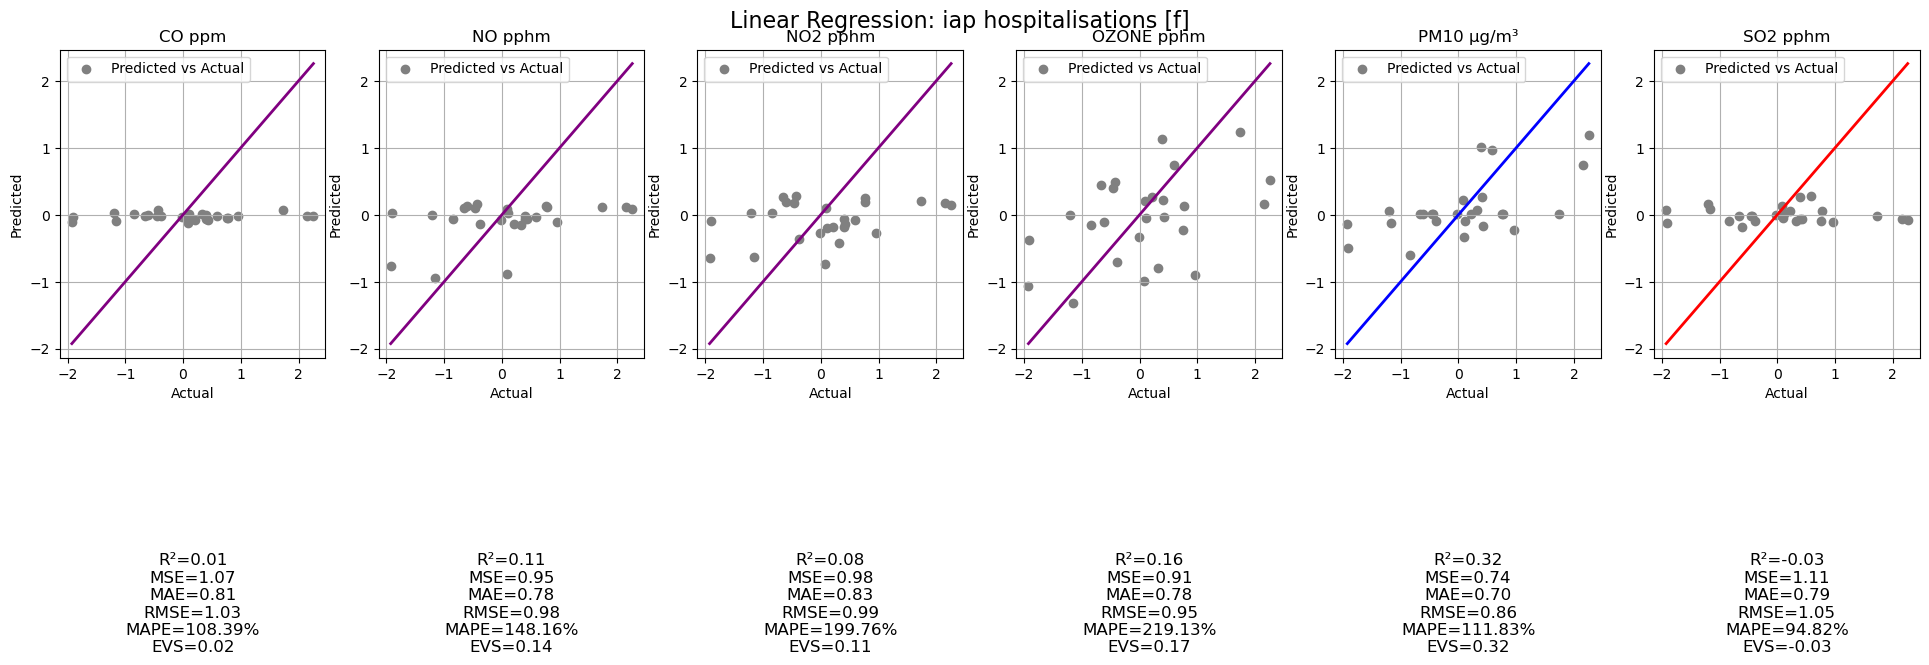

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\4074265330.py:56: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.


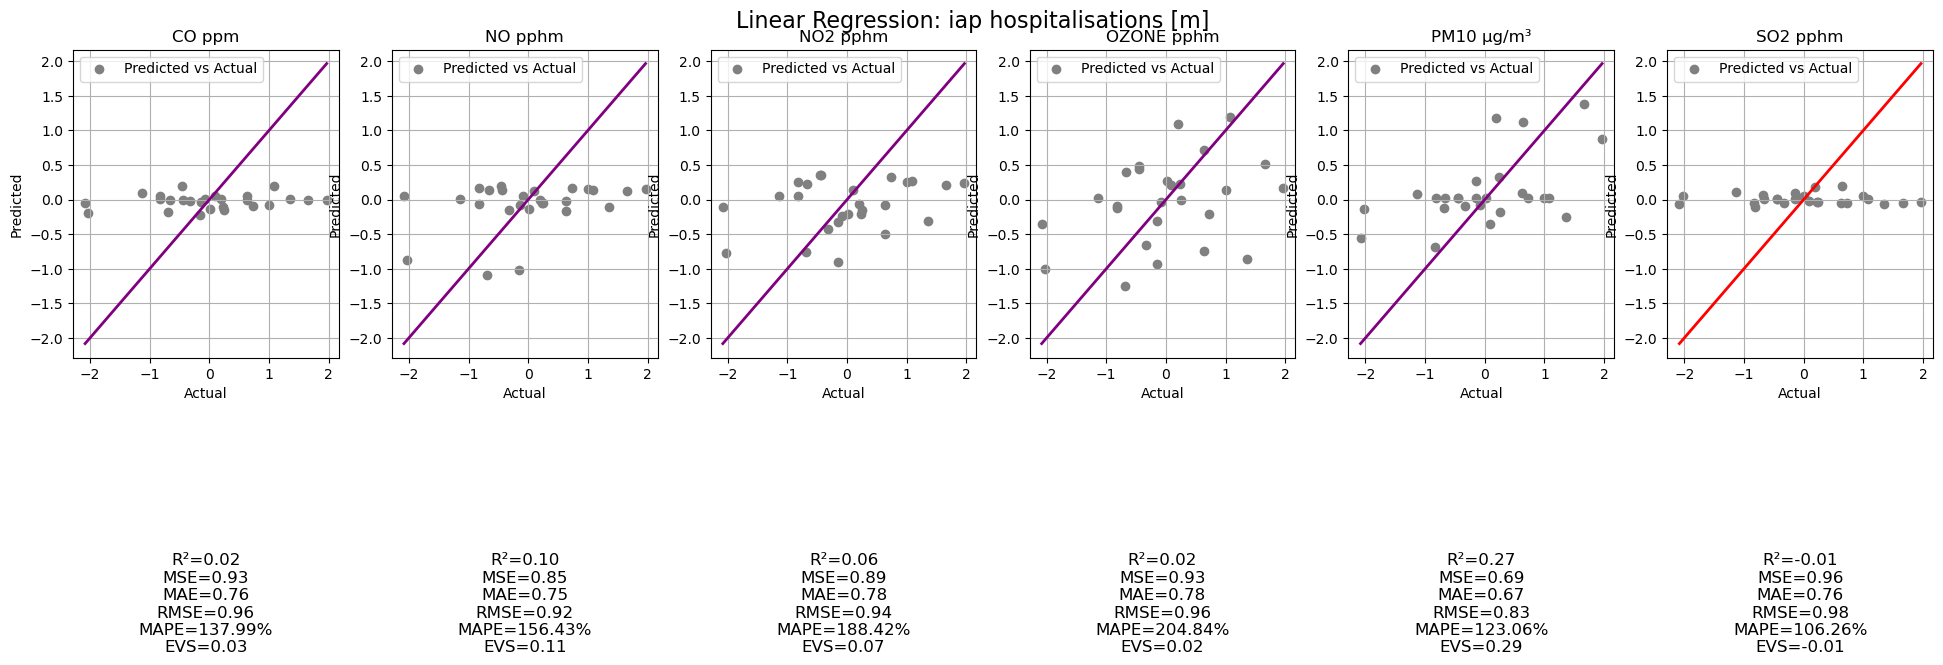

In [7]:
# Number of pollutants
num_pollutants = len(pollutant_columns)

# Loop through each health statistic column
for i, health_stat in enumerate(health_stat_columns):
    fig, axes = plt.subplots(1, num_pollutants, figsize=(24, 4))                                                # Create a subplot with 1 row and 6 columns
    
    for j, pollutant in enumerate(pollutant_columns):
        X = df[[pollutant]].values                                                                              # Independent variable (single pollutant)
        y = df[health_stat].values                                                                              # Dependent variable (health statistic)
        
        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
        
        # Fit the model on the training data
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)                                                                          # Predict the dependent variable on the test data
        
        # Calculate various evaluation metrics
        r2 = r2_score(y_test, y_pred)                                                                           # R² score
        mse = mean_squared_error(y_test, y_pred)                                                                # Mean Squared Error
        mae = mean_absolute_error(y_test, y_pred)                                                               # Mean Absolute Error
        rmse = np.sqrt(mse)                                                                                     # Root Mean Squared Error
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100                                                # Mean Absolute Percentage Error
        evs = explained_variance_score(y_test, y_pred)                                                          # Explained Variance Score

        # Determine the color of the best fit line based on R² score
        if r2 <= 0:
            line_color = 'red'                                                                                 # Red color for negative R² scores (no correlation)
        elif 0 < r2 <= 0.3:
            line_color = 'purple'                                                                              # Purple color for R² scores between 0 and 0.3 (poor correlation)
        elif 0.3 < r2 <= 0.5:
            line_color = 'blue'                                                                                # Blue color for R² scores between 0.3 and 0.5 (promising correlation)
        else:
            line_color = 'green'                                                                               # Green color for R² scores above 0.5 (acceptable correlation)
        
        # Plot the actual vs predicted values
        axes[j].scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
        axes[j].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2)
        axes[j].set_xlabel('Actual')                                                                            # Label for x-axis
        axes[j].set_ylabel('Predicted')                                                                         # Label for y-axis
        axes[j].set_title(f'{pollutant}')                                                                       # Title of the plot
        axes[j].legend()                                                                                        # Show legend
        axes[j].grid(True)                                                                                      # Show grid
        
        # Display evaluation metrics below the plot with full names
        metrics_text = (f'R²={r2:.2f}\n'
                        f'MSE={mse:.2f}\n'
                        f'MAE={mae:.2f}\n'
                        f'RMSE={rmse:.2f}\n'
                        f'MAPE={mape:.2f}%\n'
                        f'EVS={evs:.2f}')
        axes[j].text(0.5, -0.8, metrics_text, transform=axes[j].transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center')
    
    plt.suptitle(f'Linear Regression: {health_stat}', fontsize=16)                                              # Title for the entire figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])                                                                      # Adjust subplots to fit into figure area.
    plt.show()                                                                                                  # Display the plot


## All Features (Health Outcomes)

Here is an inverse of the first model, switching the label and feature so a single Pollutant is assessed against all Health Outcomes.

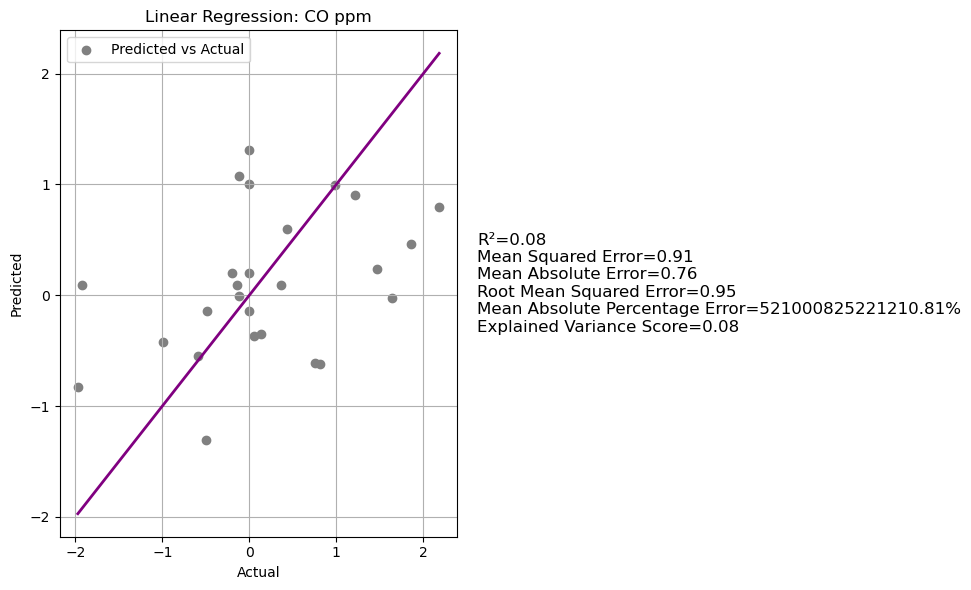

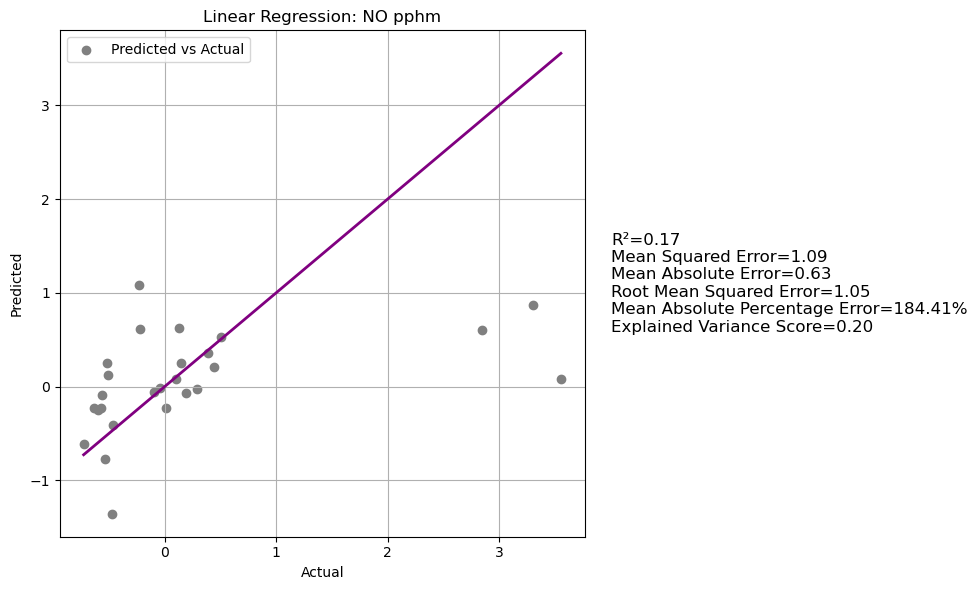

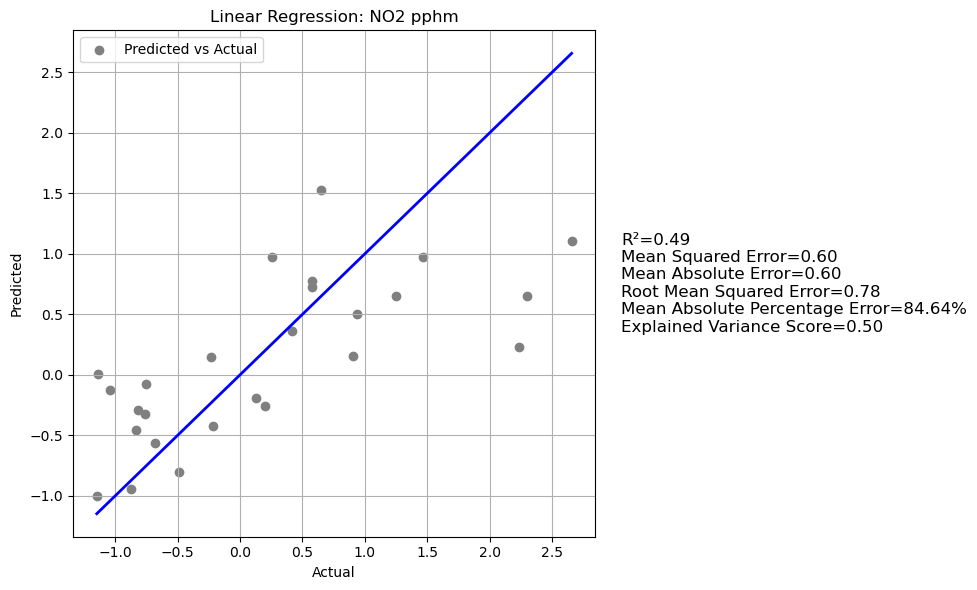

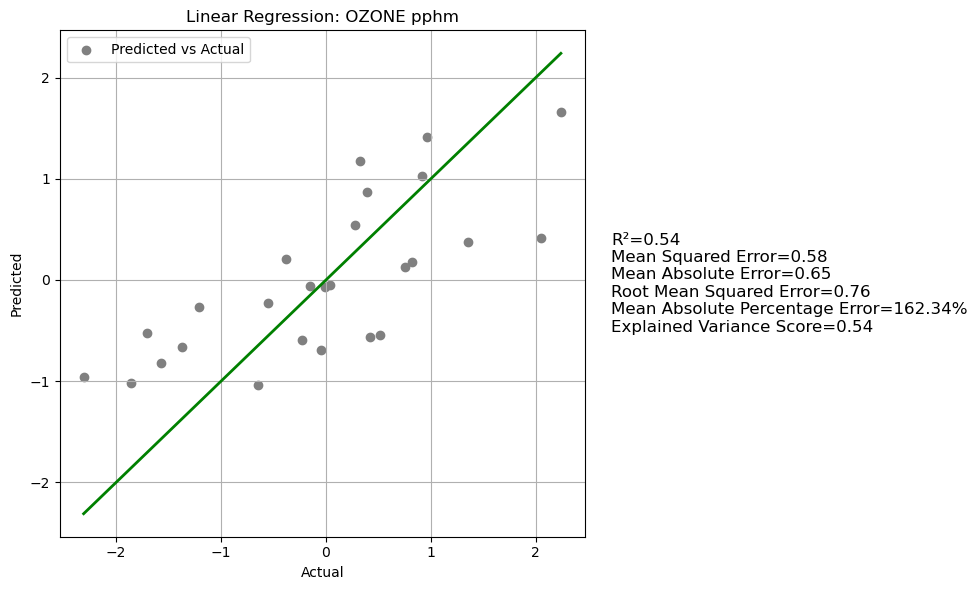

C:\Users\matth\AppData\Local\Temp\ipykernel_15456\902055938.py:18: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error


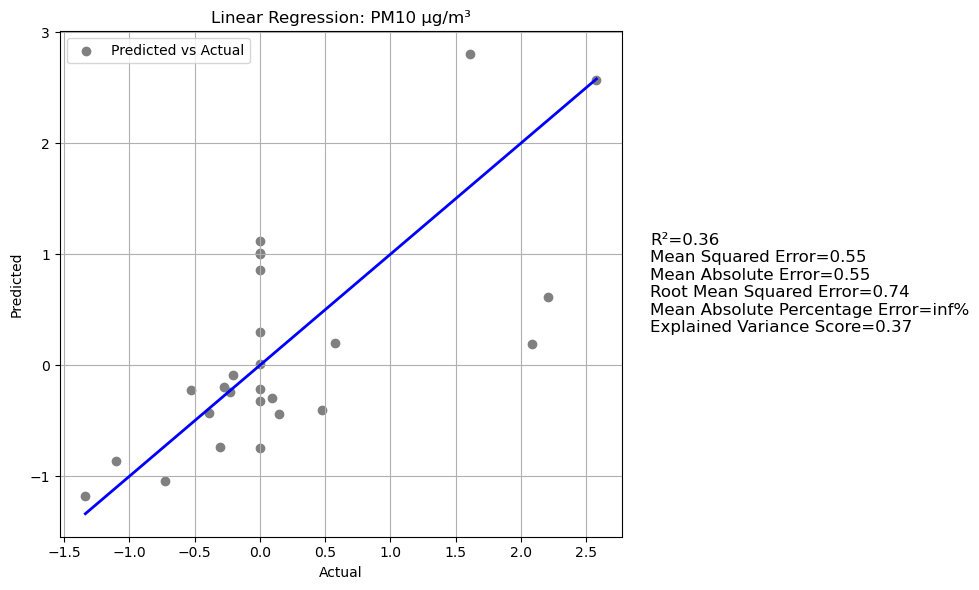

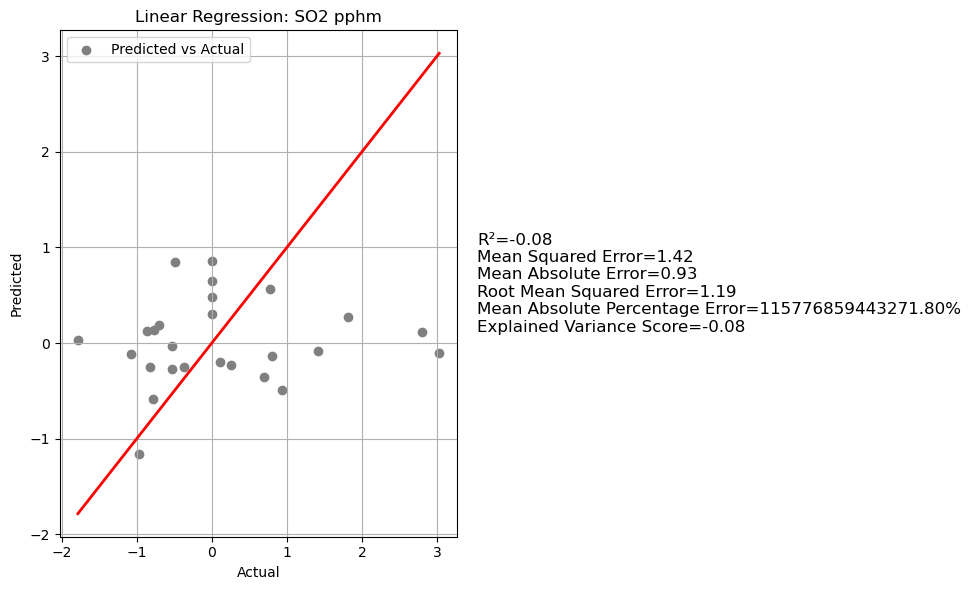

In [8]:
# Loop through each pollutant column
for i, pollutant in enumerate(pollutant_columns):
    X = df[health_stat_columns].values  # Independent variables (health statistics)
    y = df[pollutant].values            # Dependent variable (pollutant)
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  # Predict the dependent variable on the test data
    
    # Calculate various evaluation metrics
    r2 = r2_score(y_test, y_pred)  # R² score
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
    evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'  # Red color for negative R² scores (no correlation)
    elif 0 < r2 <= 0.3:
        line_color = 'purple'  # Purple color for R² scores between 0 and 0.3 (poor correlation)
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'  # Blue color for R² scores between 0.3 and 0.5 (promising correlation)
    else:
        line_color = 'green'  # Green color for R² scores above 0.5 (acceptable correlation)
        
    # Create a new figure for each pollutant
    plt.figure(figsize=(10, 6))
    
    # Plot the actual vs predicted values
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2)
    plt.xlabel('Actual')  # Label for x-axis
    plt.ylabel('Predicted')  # Label for y-axis
    plt.title(f'Linear Regression: {pollutant}')  # Title of the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    
    # Display evaluation metrics next to the plot with full names
    metrics_text = (f'R²={r2:.2f}\n'
                    f'Mean Squared Error={mse:.2f}\n'
                    f'Mean Absolute Error={mae:.2f}\n'
                    f'Root Mean Squared Error={rmse:.2f}\n'
                    f'Mean Absolute Percentage Error={mape:.2f}%\n'
                    f'Explained Variance Score={evs:.2f}')
    plt.text(1.05, 0.5, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')
    
    plt.tight_layout()                                                                                      # Adjust subplots to fit into figure area.
    plt.show()                                                                                              # Display the plot